# Fitting CHESS temperature dependent linecuts

## Import functions

In [1]:
from nxs_analysis_tools.datareduction import load_data, Scissors
from nxs_analysis_tools.chess import *
from nxs_analysis_tools.datasets import cubic

from lmfit.models import GaussianModel, LinearModel

# Load example datasets and store cache directory
sample_directory = cubic()

## Create TempDependence object and load data

In [2]:
sample = TempDependence(sample_directory)

In [3]:
sample.load_transforms()
# Or, load_datasets() if using legacy CHESS data format

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)
data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64

## Perform linecuts

In [4]:
sample.cut_data(center=(0,0,0), window=(0.1,0.5,0.1))

{'15': NXdata('data'),
 '25': NXdata('data'),
 '35': NXdata('data'),
 '45': NXdata('data'),
 '55': NXdata('data'),
 '65': NXdata('data'),
 '75': NXdata('data'),
 '80': NXdata('data'),
 '104': NXdata('data'),
 '128': NXdata('data'),
 '153': NXdata('data'),
 '177': NXdata('data'),
 '202': NXdata('data'),
 '226': NXdata('data'),
 '251': NXdata('data'),
 '275': NXdata('data'),
 '300': NXdata('data')}

## The `LinecutModel` class

Each `TempDependence` object has a `LinecutModel` for each temperature, stored in the `.linecutmodels` attribute. When a linecut is performed using the `.cut_data()` method, these are automatically initialized with the x and y data from the linecut.

In [5]:
sample.linecutmodels

{'15': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa2aba10>,
 '25': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa39d450>,
 '35': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa39ca50>,
 '45': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa2b28b0>,
 '55': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa2b2ea0>,
 '65': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa3fa570>,
 '75': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa37dbf0>,
 '80': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa37d370>,
 '104': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa361450>,
 '128': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa360b50>,
 '153': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa364230>,
 '177': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa364050>,
 '202': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa394670>,
 '226': <nxs_analysis_tools.fitting.LinecutModel at 0x207aa3949f0>,
 '251': <nxs_analysis_tools.fitting.LinecutModel at 0x20

## Create `lmfit` model

Use the `.set_model_components()` method to set the model to be used for fitting the linecut. The `model_components` parameter must be a `Model`, `CompositeModel`, or `list` of `Model` objects.

In [6]:
# Using a list of Model objects
sample.set_model_components([GaussianModel(prefix='peak'), LinearModel(prefix='background')])

# Using a CompositeModel
sample.set_model_components(GaussianModel(prefix='peak') + LinearModel(prefix='background'))

Upon setting the model, the `.params` attribute of each `LinecutModel` is initialized with a `Parameters` object which holds the parameters for all components of the model.

In [7]:
sample.linecutmodels['15'].params

name,value,initial value,min,max,vary,expression
peakamplitude,1.00000000,None,-inf,inf,True,
peakcenter,0.00000000,None,-inf,inf,True,
peaksigma,1.00000000,None,0.00000000,inf,True,
backgroundslope,1.00000000,None,-inf,inf,True,
backgroundintercept,0.00000000,None,-inf,inf,True,
peakfwhm,2.35482000,None,-inf,inf,False,2.3548200*peaksigma
peakheight,0.39894230,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


## Performing an initial guess

Use the `.guess()` method to perform an initial guess, which will overwrite any changes made to the parameter values and constraints set in the `.params` attribute.

In [8]:
sample.guess()

To view the guessed initial values, we can inspect the `.params` attribute for any given dataset.

In [9]:
sample.linecutmodels['15'].params

name,value,initial value,min,max,vary,expression
peakamplitude,482528.725,482528.7250417659,-inf,inf,True,
peakcenter,-7.4015e-17,-7.401486830834377e-17,-inf,inf,True,
peaksigma,0.05033557,0.05033557046979864,0.00000000,inf,True,
backgroundslope,9.2718e-11,9.271792676819166e-11,-inf,inf,True,
backgroundintercept,404986.472,404986.4717240573,-inf,inf,True,
peakfwhm,0.11853121,None,-inf,inf,False,2.3548200*peaksigma
peakheight,3824355.57,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


## Visualize the initial guesses

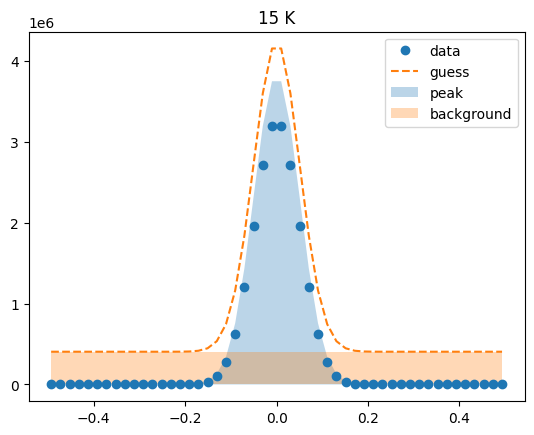

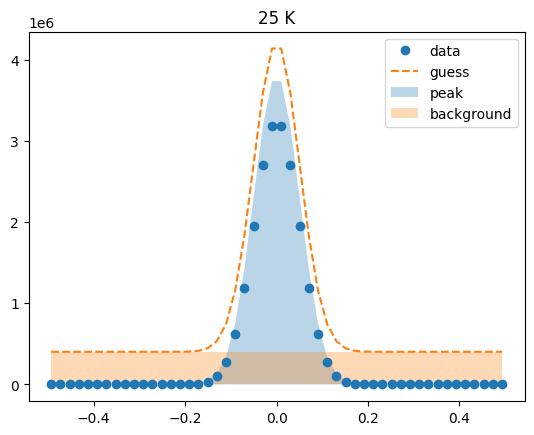

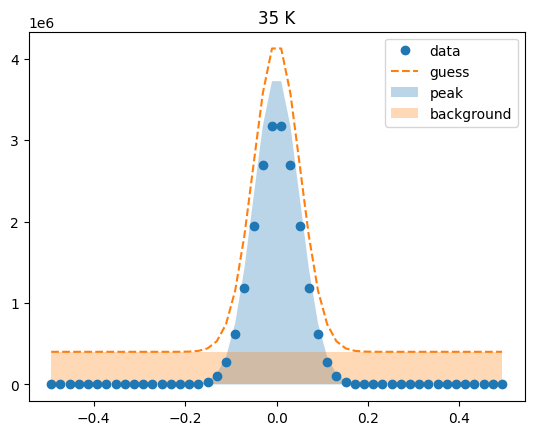

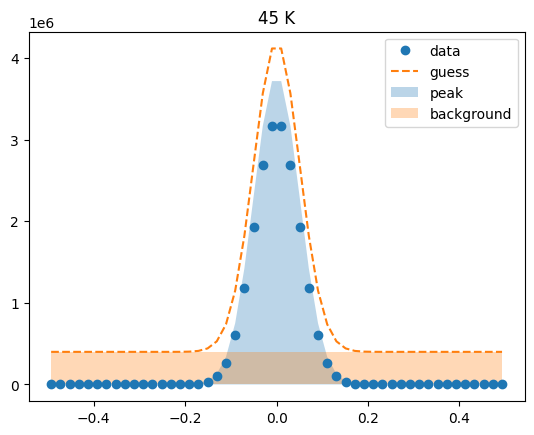

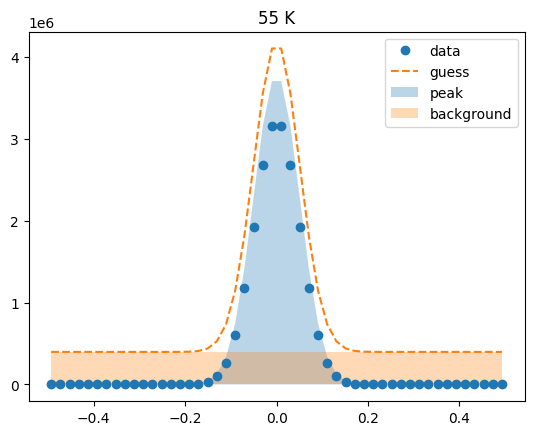

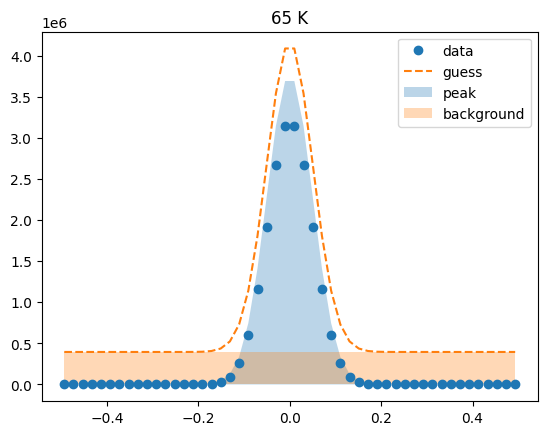

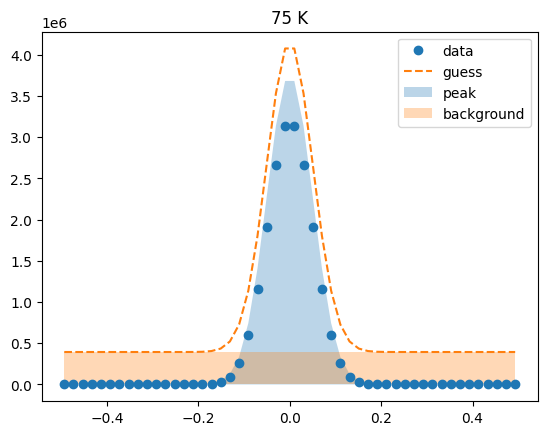

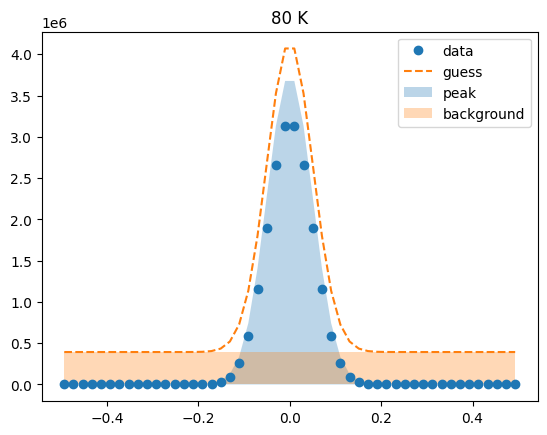

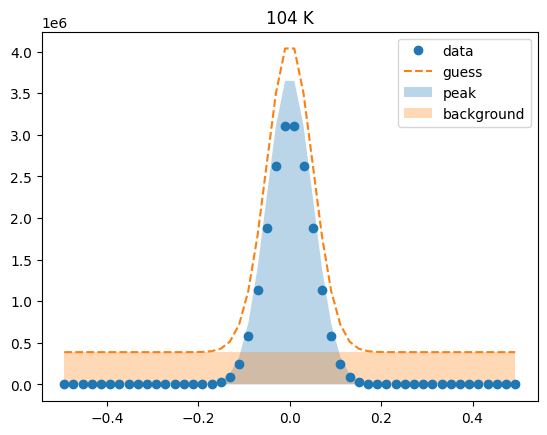

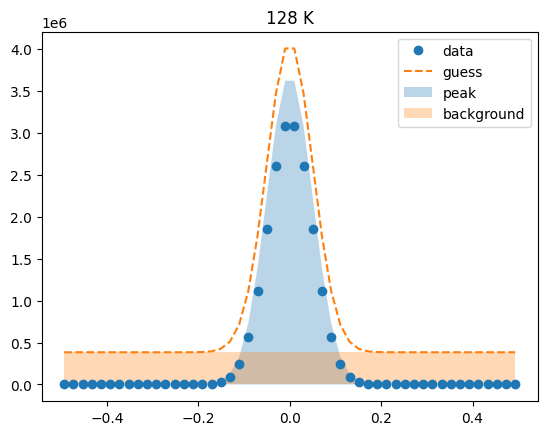

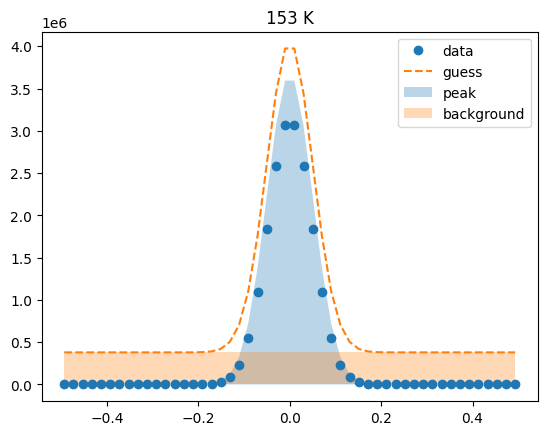

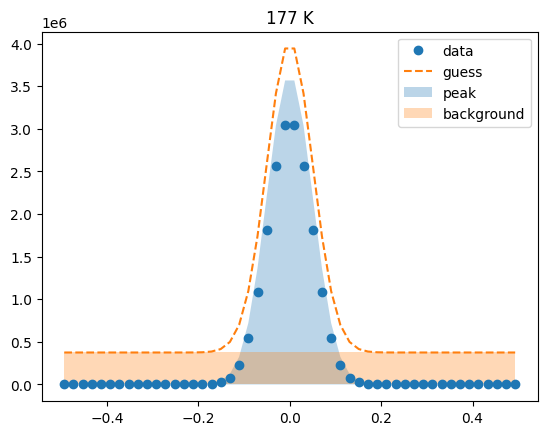

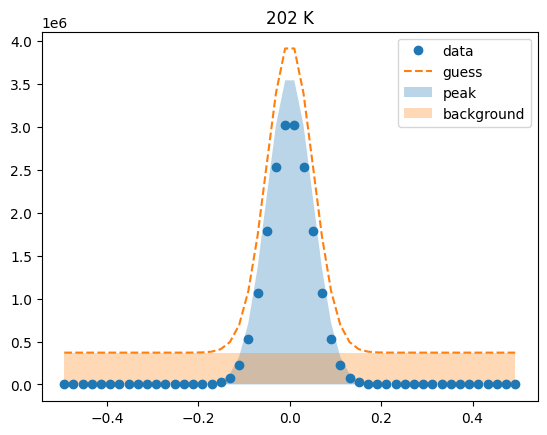

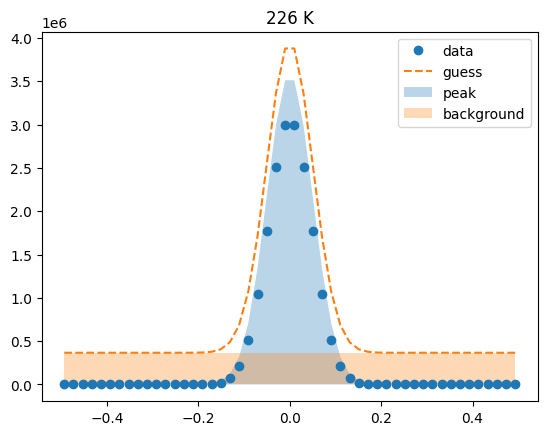

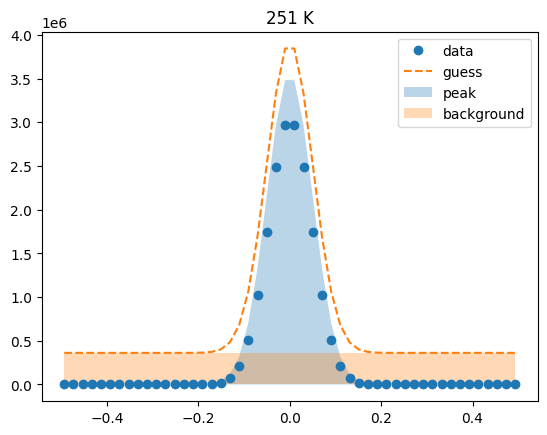

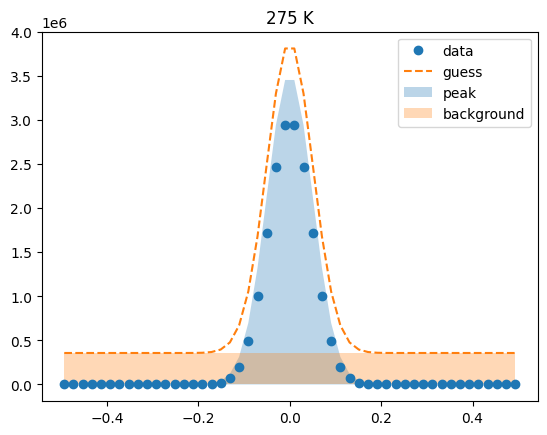

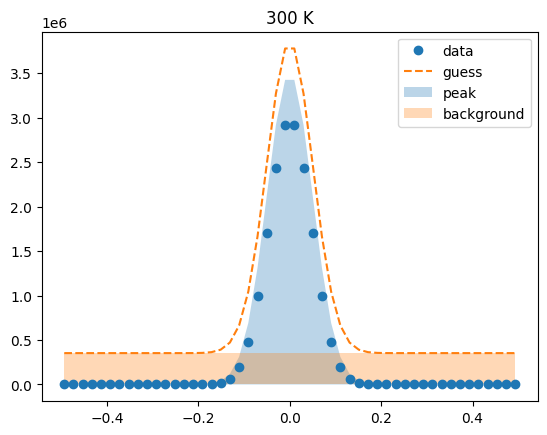

In [10]:
sample.plot_initial_guess()

## Set parameter constraints

All constraints are set by accessing the individiual parameters through the `.params` attribute. See [https://lmfit.github.io/lmfit-py/constraints.html](https://lmfit.github.io/lmfit-py/constraints.html) for more information on mathematical constraints allowed by `lmfit`.

In [11]:
# Constrain the peak amplitude to be positive
sample.linecutmodels['15'].params['peakamplitude'].set(min=0)

# Constrain the range of the peak center
sample.linecutmodels['15'].params['peakcenter'].set(min=-0.1, max=0.1)

If we inspect the `.params` attribute again, we should see that the constraints are implemented.

In [12]:
sample.linecutmodels['15'].params

name,value,initial value,min,max,vary,expression
peakamplitude,482528.725,482528.7250417659,0.00000000,inf,True,
peakcenter,-7.4015e-17,-7.401486830834377e-17,-0.10000000,0.10000000,True,
peaksigma,0.05033557,0.05033557046979864,0.00000000,inf,True,
backgroundslope,9.2718e-11,9.271792676819166e-11,-inf,inf,True,
backgroundintercept,404986.472,404986.4717240573,-inf,inf,True,
peakfwhm,0.11853121,None,-inf,inf,False,2.3548200*peaksigma
peakheight,3824355.57,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


It is practical in many cases to set a constraint for all datasets at once, since they are likely to have very similar data. For example, we may wish to constrain the peak center to range between -0.1 and 0.1 at all temperatures, with an initial value of 0.05.

Rather than accessing each temperature manually, we can use the `.params_set()` method of the `TempDependence` object to set a constraint on all the  `LinecutModel` objects at once.

In [13]:
sample.params_set(name='peakcenter', value=0.05, min=-0.1, max=0.1)

Now, we can examine the individual parameters of any `LinecutModel` and find that the constraint has been applied.

In [14]:
sample.linecutmodels['300'].params

name,value,initial value,min,max,vary,expression
peakamplitude,441104.184,441104.18388416775,-inf,inf,True,
peakcenter,0.05000000,0.05,-0.10000000,0.10000000,True,
peaksigma,0.05033557,0.05033557046979864,0.00000000,inf,True,
backgroundslope,8.3374e-11,8.33739637361666e-11,-inf,inf,True,
backgroundintercept,352859.729,352859.7293307577,-inf,inf,True,
peakfwhm,0.11853121,None,-inf,inf,False,2.3548200*peaksigma
peakheight,3496039.00,None,-inf,inf,False,"0.3989423*peakamplitude/max(1e-15, peaksigma)"


## Perform the fit

The `.fit()` method here automatically assumes the parameter values and constraints currently stored in the `.params` attribute of each model, and feeds them to the `.fit()` method from `lmfit`. 

In [15]:
sample.fit()

Fits completed.


## Visualize the fits

Once the fit is complete, we can visualize the fit and the residuals using the `.plot_fit()` method of each `LinecutModel`.

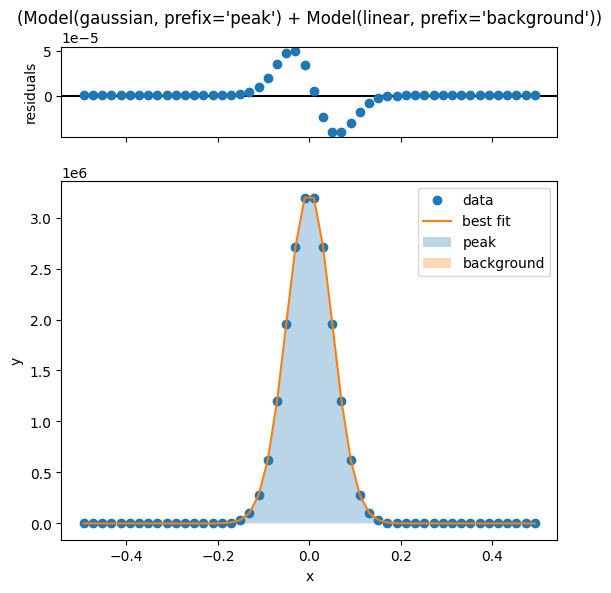

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 1.2967e-08
    reduced chi-square = 2.8815e-10
    Akaike info crit   = -1093.64505
    Bayesian info crit = -1084.08494
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        407704.502 +/- 1.4444e-06 (0.00%) (init = 482528.7)
    peakcenter:           1.1132e-12 +/- 1.7434e-13 (15.66%) (init = 0.05)
    peaksigma:            0.04987484 +/- 1.8553e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      5.2181e-11 +/- 8.8501e-06 (16960378.68%) (init = 9.271793e-11)
    backgroundintercept: -6.1477e-07 +/- 2.7978e-06 (455.10%) (init = 404986.5)
    peakfwhm:             0.11744628 +/- 4.3690e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3261174.59 +/- 1.0108e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15,

<Axes: xlabel='x', ylabel='y'>

In [16]:
sample.linecutmodels['15'].plot_fit()

## Visualize all fits

The `.plot_fit()` method of the `TempDependence` object prints fit results for all temperatures. The parameter `fit_report` (default `True`) determines whether the fit report is also printed.

Additionally, an optional Markdown heading can be displayed using the `mdheadings` parameter (default `False`).

### 15 K Fit Results

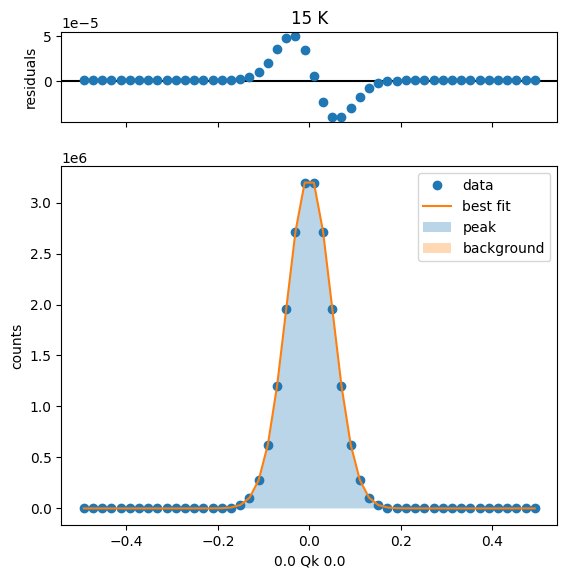

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 1.2967e-08
    reduced chi-square = 2.8815e-10
    Akaike info crit   = -1093.64505
    Bayesian info crit = -1084.08494
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        407704.502 +/- 1.4444e-06 (0.00%) (init = 482528.7)
    peakcenter:           1.1132e-12 +/- 1.7434e-13 (15.66%) (init = 0.05)
    peaksigma:            0.04987484 +/- 1.8553e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      5.2181e-11 +/- 8.8501e-06 (16960378.68%) (init = 9.271793e-11)
    backgroundintercept: -6.1477e-07 +/- 2.7978e-06 (455.10%) (init = 404986.5)
    peakfwhm:             0.11744628 +/- 4.3690e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3261174.59 +/- 1.0108e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15,

### 25 K Fit Results

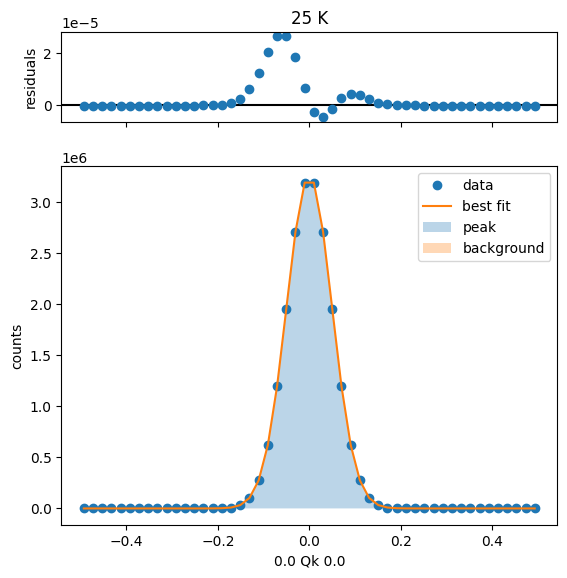

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 2.5050e-09
    reduced chi-square = 5.5667e-11
    Akaike info crit   = -1175.84954
    Bayesian info crit = -1166.28943
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        405849.455 +/- 6.3444e-07 (0.00%) (init = 481106.9)
    peakcenter:           3.5202e-13 +/- 7.7053e-14 (21.89%) (init = 0.05)
    peaksigma:            0.04979123 +/- 8.1628e-14 (0.00%) (init = 0.05033557)
    backgroundslope:     -8.3962e-11 +/- 3.9195e-06 (4668216.45%) (init = 9.206435e-11)
    backgroundintercept:  3.1923e-08 +/- 1.2291e-06 (3850.20%) (init = 403143.8)
    peakfwhm:             0.11724939 +/- 1.9222e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3251787.76 +/- 4.4502e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15,

### 35 K Fit Results

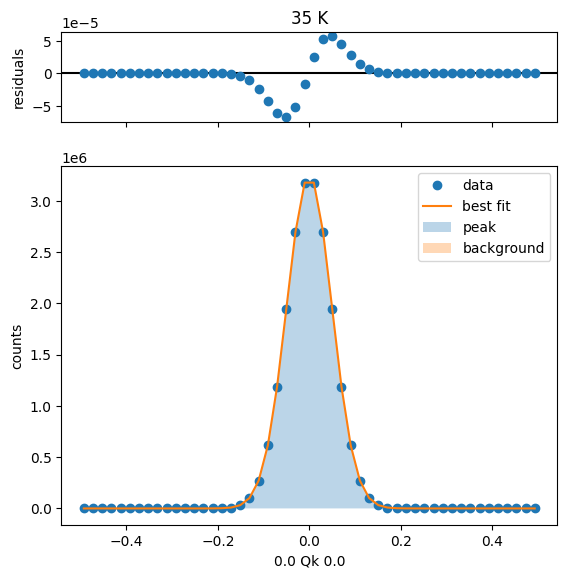

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 2.3783e-08
    reduced chi-square = 5.2850e-10
    Akaike info crit   = -1063.31666
    Bayesian info crit = -1053.75654
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        403995.273 +/- 1.9528e-06 (0.00%) (init = 479682.7)
    peakcenter:          -1.5850e-12 +/- 2.3985e-13 (15.13%) (init = 0.05)
    peaksigma:            0.04970748 +/- 2.5239e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      1.4944e-10 +/- 1.2066e-05 (8074472.07%) (init = 8.948964e-11)
    backgroundintercept: -5.6968e-07 +/- 3.7885e-06 (665.03%) (init = 401302)
    peakfwhm:             0.11705216 +/- 5.9433e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3242385.47 +/- 1.3709e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15, pe

### 45 K Fit Results

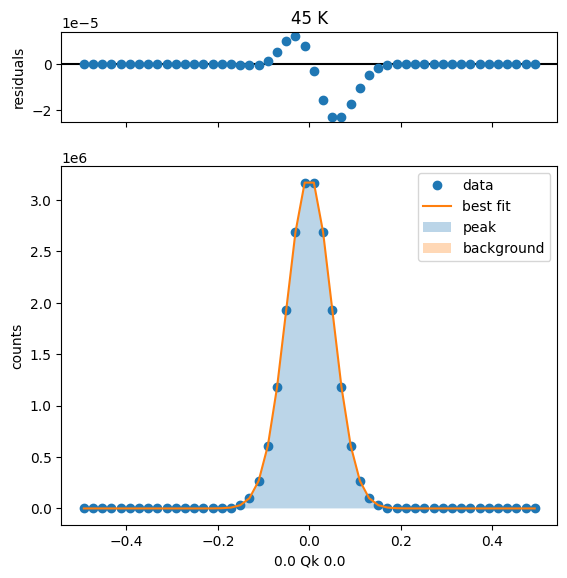

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 2.1052e-09
    reduced chi-square = 4.6782e-11
    Akaike info crit   = -1184.54427
    Bayesian info crit = -1174.98416
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        402141.971 +/- 5.8073e-07 (0.00%) (init = 478256.3)
    peakcenter:           4.2026e-13 +/- 7.0919e-14 (16.87%) (init = 0.05)
    peaksigma:            0.04962358 +/- 7.5193e-14 (0.00%) (init = 0.05033557)
    backgroundslope:     -2.3186e-11 +/- 3.5284e-06 (15217766.60%) (init = 8.969425e-11)
    backgroundintercept: -1.6597e-07 +/- 1.1265e-06 (678.75%) (init = 399461)
    peakfwhm:             0.11685461 +/- 1.7707e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3232967.73 +/- 4.0847e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, p

### 55 K Fit Results

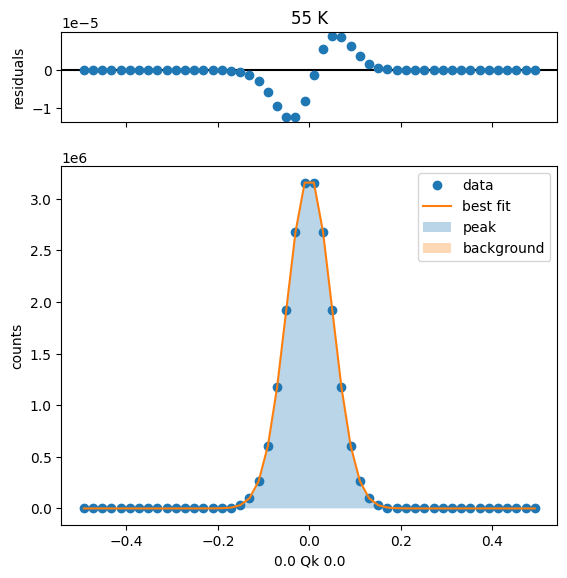

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 7.4821e-10
    reduced chi-square = 1.6627e-11
    Akaike info crit   = -1236.26814
    Bayesian info crit = -1226.70803
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        400289.564 +/- 3.4600e-07 (0.00%) (init = 476827.5)
    peakcenter:          -2.6987e-13 +/- 4.2480e-14 (15.74%) (init = 0.05)
    peaksigma:            0.04953955 +/- 4.4888e-14 (0.00%) (init = 0.05033557)
    backgroundslope:     -6.0345e-11 +/- 2.1292e-06 (3528309.34%) (init = 9.27811e-11)
    backgroundintercept:  7.4672e-08 +/- 6.7120e-07 (898.87%) (init = 397621)
    peakfwhm:             0.11665671 +/- 1.0570e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3223534.55 +/- 2.4388e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, pea

### 65 K Fit Results

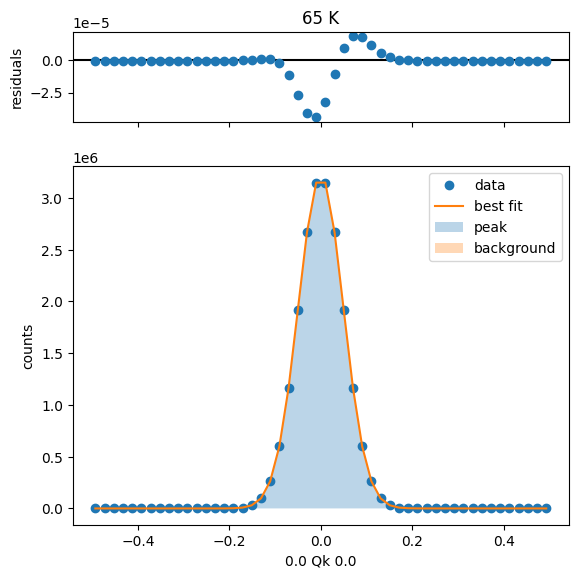

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 6.6108e-09
    reduced chi-square = 1.4691e-10
    Akaike info crit   = -1127.32946
    Bayesian info crit = -1117.76934
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        398438.067 +/- 1.0274e-06 (0.00%) (init = 475396.4)
    peakcenter:          -4.5654e-13 +/- 1.2663e-13 (27.74%) (init = 0.05)
    peaksigma:            0.04945537 +/- 1.3356e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      1.3468e-09 +/- 5.1742e-06 (384174.92%) (init = 8.492314e-11)
    backgroundintercept:  3.7242e-07 +/- 1.9939e-06 (535.38%) (init = 395781.8)
    peakfwhm:             0.11645849 +/- 3.1451e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3214085.92 +/- 7.2602e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, p

### 75 K Fit Results

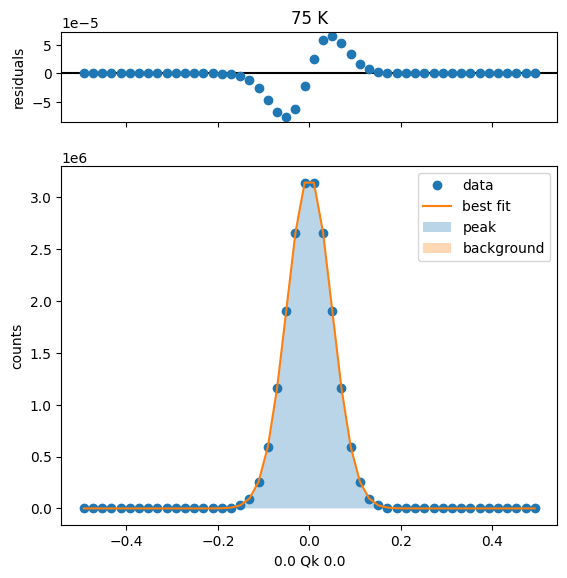

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 3.1055e-08
    reduced chi-square = 6.9011e-10
    Akaike info crit   = -1049.97630
    Bayesian info crit = -1040.41619
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        396587.494 +/- 2.2302e-06 (0.00%) (init = 473963)
    peakcenter:          -1.8307e-12 +/- 2.7811e-13 (15.19%) (init = 0.05)
    peaksigma:            0.04937104 +/- 2.9190e-13 (0.00%) (init = 0.05033557)
    backgroundslope:     -4.5616e-07 +/- 1.2699e-05 (2783.91%) (init = 9.308819e-11)
    backgroundintercept: -1.2476e-07 +/- 4.3207e-06 (3463.22%) (init = 393943.6)
    peakfwhm:             0.11625992 +/- 6.8736e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3204621.85 +/- 1.5739e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15, peak

### 80 K Fit Results

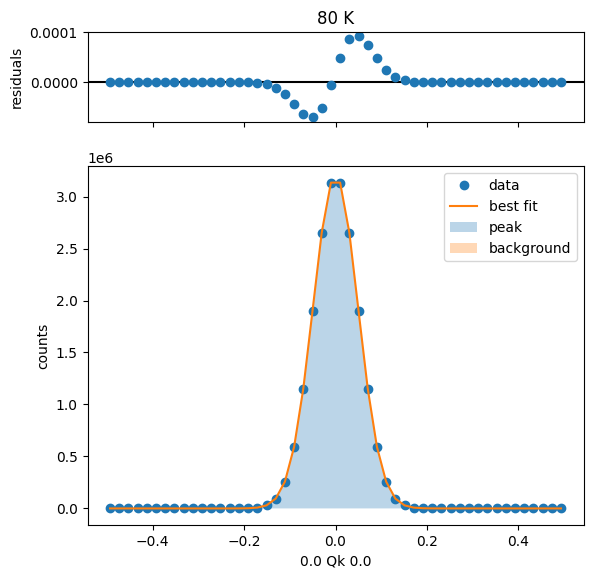

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 4.0817e-08
    reduced chi-square = 9.0704e-10
    Akaike info crit   = -1036.31003
    Bayesian info crit = -1026.74991
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        395662.559 +/- 2.5491e-06 (0.00%) (init = 473245.4)
    peakcenter:          -2.0652e-12 +/- 3.1738e-13 (15.37%) (init = 0.05)
    peaksigma:            0.04932883 +/- 3.3349e-13 (0.00%) (init = 0.05033557)
    backgroundslope:     -2.0195e-07 +/- 6.6918e-06 (3313.63%) (init = 8.835303e-11)
    backgroundintercept:  1.3057e-07 +/- 5.0051e-06 (3833.27%) (init = 393024.8)
    peakfwhm:             0.11616051 +/- 7.8531e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3199884.04 +/- 1.8042e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15, pe

### 104 K Fit Results

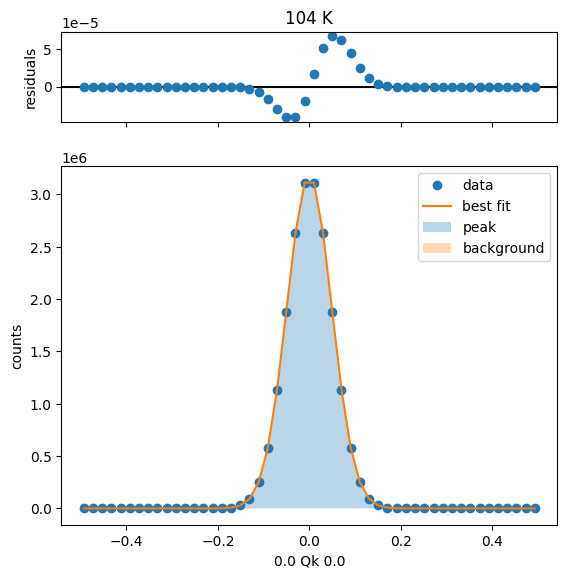

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 1.9329e-08
    reduced chi-square = 4.2954e-10
    Akaike info crit   = -1073.68348
    Bayesian info crit = -1064.12336
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        391226.201 +/- 1.7457e-06 (0.00%) (init = 469793.1)
    peakcenter:          -1.4012e-12 +/- 2.1892e-13 (15.62%) (init = 0.05)
    peaksigma:            0.04912569 +/- 2.3028e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      5.6759e-11 +/- 1.0891e-05 (19188710.88%) (init = 8.745961e-11)
    backgroundintercept:  6.1759e-07 +/- 3.4059e-06 (551.48%) (init = 388618)
    peakfwhm:             0.11568216 +/- 5.4227e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3177088.87 +/- 1.2440e-05 (0.00%) == '0.3989423*peakamplitude/max(1e-15, p

### 128 K Fit Results

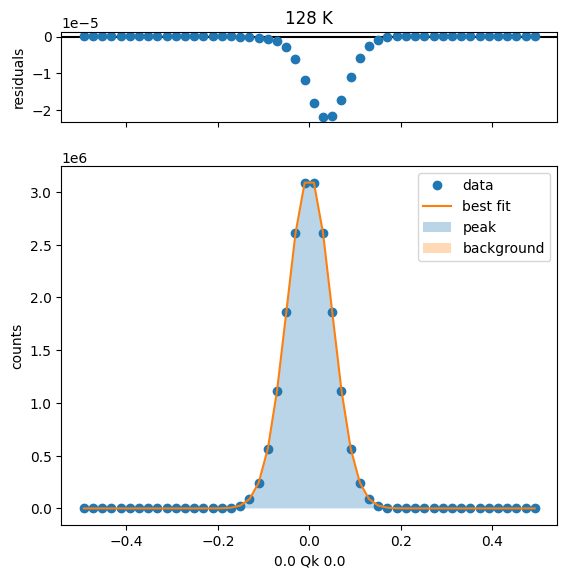

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 1.9148e-09
    reduced chi-square = 4.2551e-11
    Akaike info crit   = -1189.28417
    Bayesian info crit = -1179.72406
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        386795.510 +/- 5.4867e-07 (0.00%) (init = 466327.4)
    peakcenter:           2.4021e-13 +/- 6.8891e-14 (28.68%) (init = 0.05)
    peaksigma:            0.04892171 +/- 7.2852e-14 (0.00%) (init = 0.05033557)
    backgroundslope:     -3.2841e-12 +/- 3.4369e-06 (104651585.01%) (init = 1.059176e-10)
    backgroundintercept: -1.5162e-07 +/- 1.0713e-06 (706.60%) (init = 384216.9)
    peakfwhm:             0.11520181 +/- 1.7155e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3154205.01 +/- 3.9246e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15

### 153 K Fit Results

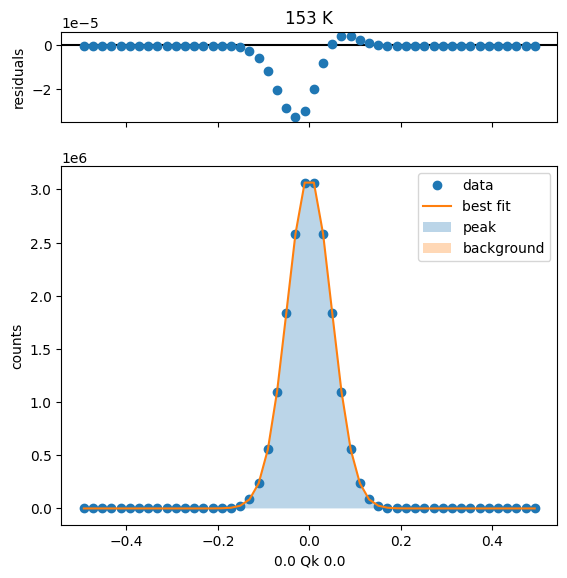

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 3.8405e-09
    reduced chi-square = 8.5345e-11
    Akaike info crit   = -1154.48387
    Bayesian info crit = -1144.92376
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        382186.468 +/- 7.7446e-07 (0.00%) (init = 462703.3)
    peakcenter:          -3.7306e-13 +/- 9.8226e-14 (26.33%) (init = 0.05)
    peaksigma:            0.04870832 +/- 1.0366e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      8.5173e-11 +/- 4.8557e-06 (5701014.67%) (init = 8.371822e-11)
    backgroundintercept:  2.0689e-07 +/- 1.5158e-06 (732.67%) (init = 379638.6)
    peakfwhm:             0.11469932 +/- 2.4411e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3130273.49 +/- 5.5703e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, 

### 177 K Fit Results

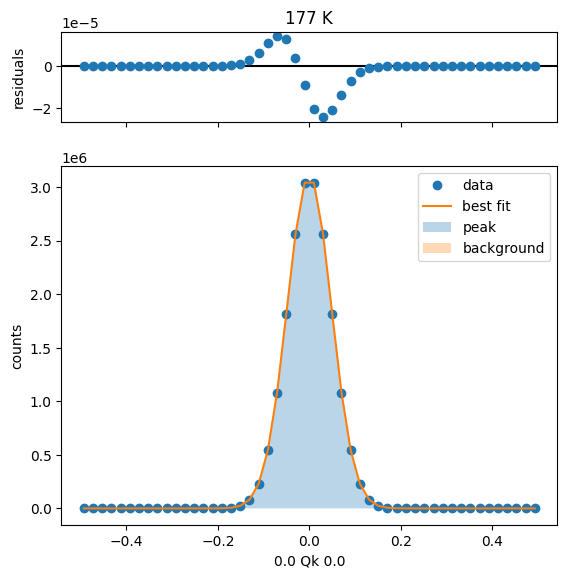

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 2.3666e-09
    reduced chi-square = 5.2592e-11
    Akaike info crit   = -1178.69127
    Bayesian info crit = -1169.13116
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        377768.024 +/- 6.0595e-07 (0.00%) (init = 459210.6)
    peakcenter:           4.3429e-13 +/- 7.7391e-14 (17.82%) (init = 0.05)
    peaksigma:            0.04850258 +/- 8.1757e-14 (0.00%) (init = 0.05033557)
    backgroundslope:      2.0609e-11 +/- 3.7965e-06 (18421553.58%) (init = 9.651552e-11)
    backgroundintercept:  2.6929e-07 +/- 1.1889e-06 (441.50%) (init = 375249.6)
    peakfwhm:             0.11421484 +/- 1.9252e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3107209.00 +/- 4.3817e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15,

### 202 K Fit Results

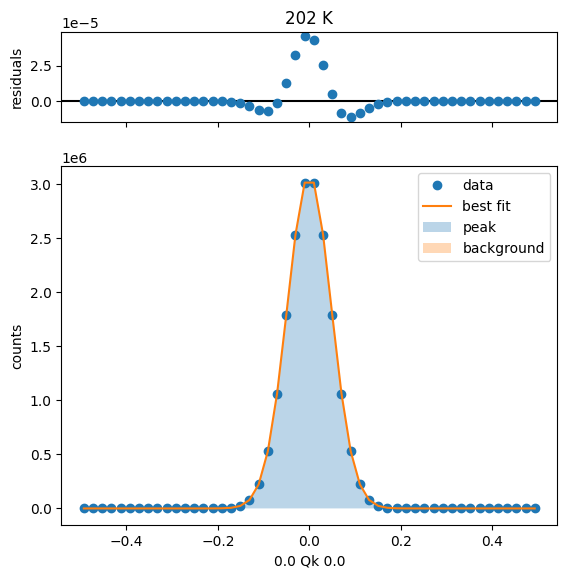

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 6.2452e-09
    reduced chi-square = 1.3878e-10
    Akaike info crit   = -1130.17372
    Bayesian info crit = -1120.61360
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        373172.219 +/- 9.8049e-07 (0.00%) (init = 455558.3)
    peakcenter:           1.0555e-13 +/- 1.2654e-13 (119.88%) (init = 0.05)
    peaksigma:            0.04828733 +/- 1.3373e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      3.8415e-11 +/- 5.8393e-06 (15200554.91%) (init = 9.613781e-11)
    backgroundintercept: -2.4300e-07 +/- 1.9309e-06 (794.61%) (init = 370684.4)
    peakfwhm:             0.11370798 +/- 3.1491e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3083089.70 +/- 7.1219e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15

### 226 K Fit Results

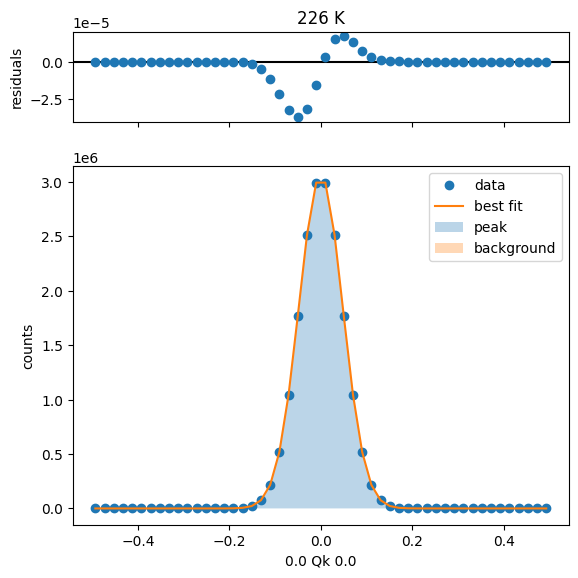

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 5.0749e-09
    reduced chi-square = 1.1277e-10
    Akaike info crit   = -1140.54957
    Bayesian info crit = -1130.98945
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        368766.953 +/- 8.8230e-07 (0.00%) (init = 452038.7)
    peakcenter:          -7.1275e-13 +/- 1.1492e-13 (16.12%) (init = 0.05)
    peaksigma:            0.04807979 +/- 1.2103e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      4.3193e-10 +/- 4.9324e-06 (1141952.13%) (init = 8.63249e-11)
    backgroundintercept: -3.5951e-07 +/- 1.7387e-06 (483.65%) (init = 366308.5)
    peakfwhm:             0.11321926 +/- 2.8500e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3059845.35 +/- 6.4415e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, p

### 251 K Fit Results

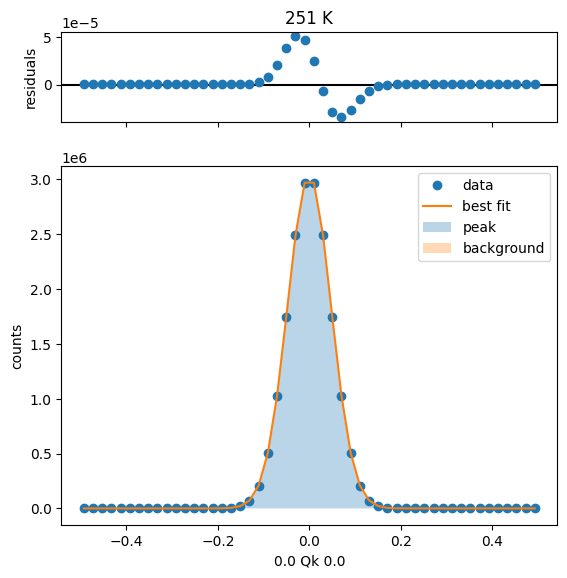

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 1.0438e-08
    reduced chi-square = 2.3196e-10
    Akaike info crit   = -1104.49142
    Bayesian info crit = -1094.93130
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        364185.373 +/- 1.2604e-06 (0.00%) (init = 448358.5)
    peakcenter:           8.7522e-13 +/- 1.6517e-13 (18.87%) (init = 0.05)
    peaksigma:            0.04786265 +/- 1.7460e-13 (0.00%) (init = 0.05033557)
    backgroundslope:     -6.2795e-11 +/- 7.1852e-06 (11442186.30%) (init = 7.43505e-11)
    backgroundintercept: -8.8632e-07 +/- 2.4920e-06 (281.17%) (init = 361757.5)
    peakfwhm:             0.11270793 +/- 4.1116e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3035539.16 +/- 9.2511e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15, 

### 275 K Fit Results

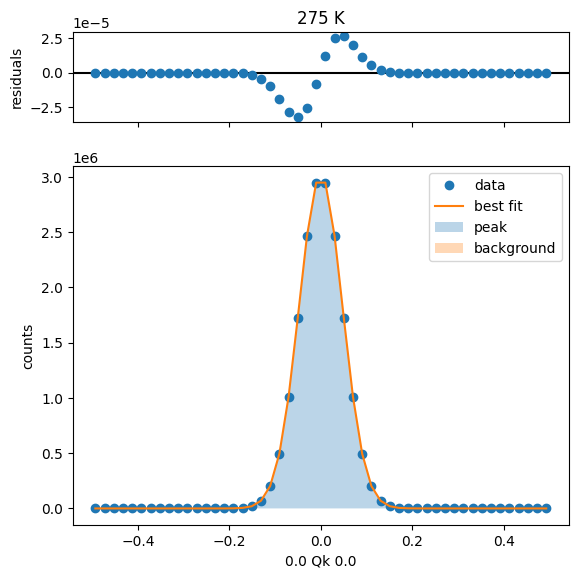

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 4.9994e-09
    reduced chi-square = 1.1110e-10
    Akaike info crit   = -1141.29849
    Bayesian info crit = -1131.73837
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        359794.249 +/- 8.7029e-07 (0.00%) (init = 444812.2)
    peakcenter:          -7.6419e-13 +/- 1.1530e-13 (15.09%) (init = 0.05)
    peaksigma:            0.04765326 +/- 1.2142e-13 (0.00%) (init = 0.05033557)
    backgroundslope:      1.9715e-11 +/- 5.5563e-06 (28182799.51%) (init = 7.568852e-11)
    backgroundintercept:  1.2981e-07 +/- 1.7232e-06 (1327.46%) (init = 357395.6)
    peakfwhm:             0.11221485 +/- 2.8593e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           3012115.87 +/- 6.4195e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15

### 300 K Fit Results

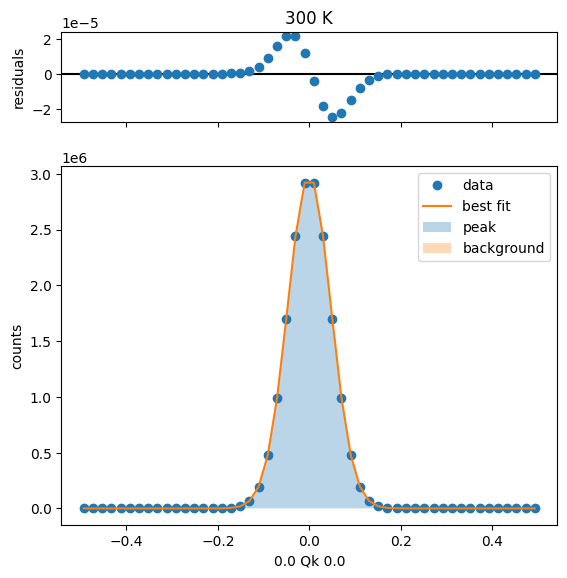

[[Model]]
    (Model(gaussian, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 50
    # variables        = 5
    chi-square         = 3.2182e-09
    reduced chi-square = 7.1516e-11
    Akaike info crit   = -1163.32326
    Bayesian info crit = -1153.76314
    R-squared          = 1.00000000
[[Variables]]
    peakamplitude:        355227.915 +/- 6.9641e-07 (0.00%) (init = 441104.2)
    peakcenter:           6.1451e-13 +/- 9.2826e-14 (15.11%) (init = 0.05)
    peaksigma:            0.04743416 +/- 9.7953e-14 (0.00%) (init = 0.05033557)
    backgroundslope:      3.1199e-10 +/- 4.1136e-06 (1318503.17%) (init = 8.337396e-11)
    backgroundintercept: -9.0053e-08 +/- 1.3815e-06 (1534.06%) (init = 352859.7)
    peakfwhm:             0.11169892 +/- 2.3066e-13 (0.00%) == '2.3548200*peaksigma'
    peakheight:           2987623.83 +/- 5.1631e-06 (0.00%) == '0.3989423*peakamplitude/max(1e-15,

In [17]:
sample.plot_fit(mdheadings=True)

## Overlay all fits

It can also be helpful to overlay the plots of all fits on a single figure. To accomplish this, we can use the `.overlay_fits()` method. 

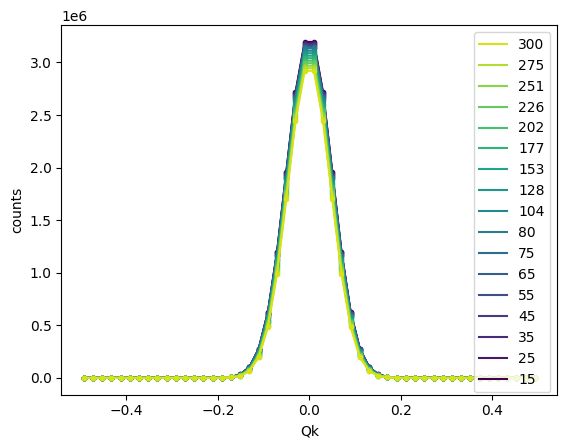

In [18]:
sample.overlay_fits()

The `numpoints` parameter specifies the number of points to use for the fit curve. A vertical offset may be specified using `vertical_offset` for clarity. The colormap is also customizable via the `cmap` argument, and other customizations can be passed to the plot functions for the data and fit components via `data_kwargs` and `fit_kwargs`, respectively.

c:\Users\steve\miniconda3\envs\nxs\Lib\site-packages\nxs_analysis_tools\chess.py:768: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.plot(lm.x, lm.y + vertical_offset * i, '.', c=colors[i], **data_kwargs)


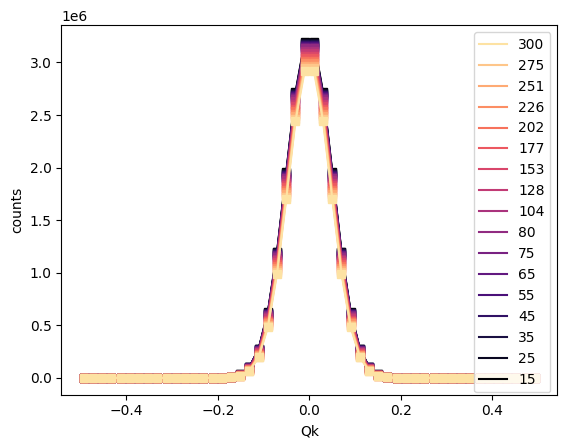

In [19]:
sample.overlay_fits(cmap='magma', data_kwargs={'marker':'s'})

## Performing a simple linecut with no customization

The `.fit_peak_simple()` method offers a quick but rudimentary way to fit a peak, using a pseudo-Voigt peak shape with a linear background.

In [20]:
sample.fit_peak_simple()

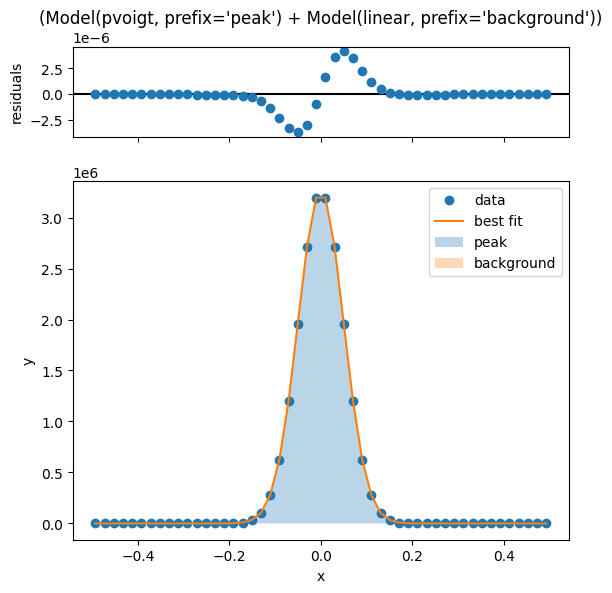

[[Model]]
    (Model(pvoigt, prefix='peak') + Model(linear, prefix='background'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 232
    # data points      = 50
    # variables        = 6
    chi-square         = 9.4309e-11
    reduced chi-square = 2.1434e-12
    Akaike info crit   = -1337.82361
    Bayesian info crit = -1326.35147
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    peakcenter:           at initial value
    peakfraction:         at boundary
    backgroundslope:      at initial value
[[Variables]]
    peakamplitude:        407704.502 (init = 603160.9)
    peakcenter:          -9.9869e-14 (init = -7.401487e-17)
    peaksigma:            0.05872314 (init = 0.05033557)
    peakfraction:         3.4500e-13 (init = 0.5)
    peakfwhm:             0.11744628 == '2.0000000*peaksigma'
    peakheight:           3261174.43 == '(((1-peakfraction)*peakamplitude)/max(1e-15, (peaksigma*sqrt(pi/log(2))))+(peakfractio

<Axes: xlabel='x', ylabel='y'>

In [21]:
sample.linecutmodels['15'].plot_fit()